# Linear Regression from Scratch

In this notebook, we implement **Linear Regression** using only NumPy and Pandas. No machine learning libraries are used.

Dataset used: **Medical Price Dataset**

**Objective:** Predict `charges` (medical costs) from patient features.

**Python Version:** 3.5+


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Medical Price Dataset.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Preprocessing
- Convert categorical variables to numerical using one-hot encoding
- Normalize numerical features

In [8]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature-target split
X = df_encoded.drop('charges', axis=1).astype(float).values
y = df_encoded['charges'].astype(float).values.reshape(-1, 1)

# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1338, 9), y shape: (1338, 1)


### Linear Regression Implementation (Gradient Descent)

In [10]:
def linear_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    for i in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        grad = X.T.dot(error) / m
        theta -= lr * grad
    
    return theta

theta = linear_regression(X, y)
print("Model trained.")

Model trained.


### Prediction and Accuracy

In [11]:
def predict(X, theta):
    return X.dot(theta)

y_pred = predict(X, theta)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_pred - y))
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 4170.35


### Visualization
Plot predicted vs actual charges.

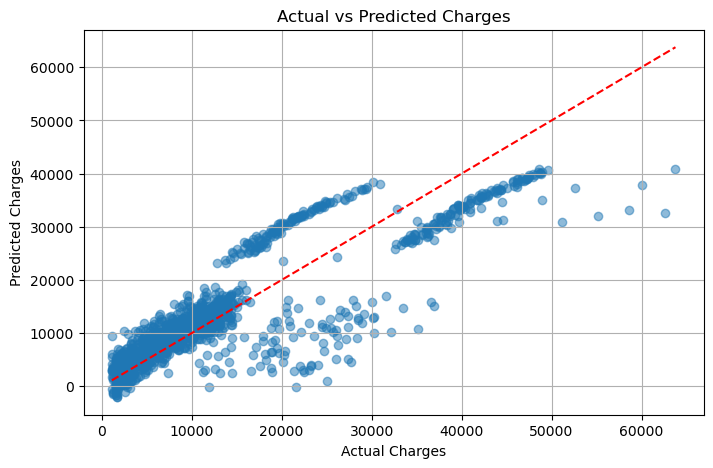

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()
